In [133]:
! pip install pandas-datareader
! pip install pmdarima
! pip install plotly

from pandas_datareader import DataReader # pip install pandas-datareader
from pandas_datareader import data
from datetime import datetime
from pmdarima.arima import *
from statsmodels.tsa.seasonal import seasonal_decompose

import pandas as pd
import pmdarima as pm
import plotly as ply
 
start = pd.to_datetime('2010-01-01') # in YYYY-MM-DD format
end = pd.to_datetime('today')
ts = data.DataReader('NDAQ', 'yahoo', start , end) # here 'yahoo' is the API to yahoo

<AxesSubplot:title={'center':'NDAQ 2010-2021'}, xlabel='Date'>

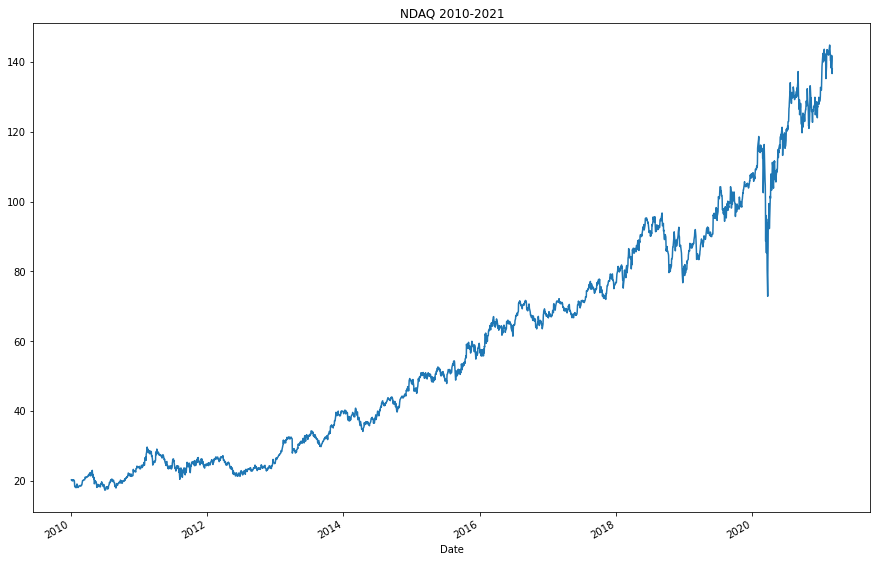

In [96]:
ts.Close.plot(figsize=(15,10), title = "NDAQ 2010-2021")

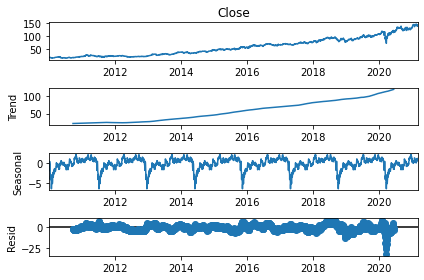

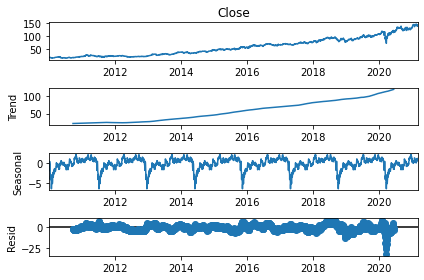

In [142]:
decomp_results = seasonal_decompose(ts.Close, period= 365)
decomp_results.plot() 

In [150]:
print (decomp_results)

In [105]:
pm.CHTest(7)

AttributeError: module 'pmdarima' has no attribute 'CHTest'

In [11]:
ts_diff = ts.diff()
ts_diff.Close[0] = 0

<AxesSubplot:title={'center':'NDAQ Diff 2010-2021'}, xlabel='Date'>

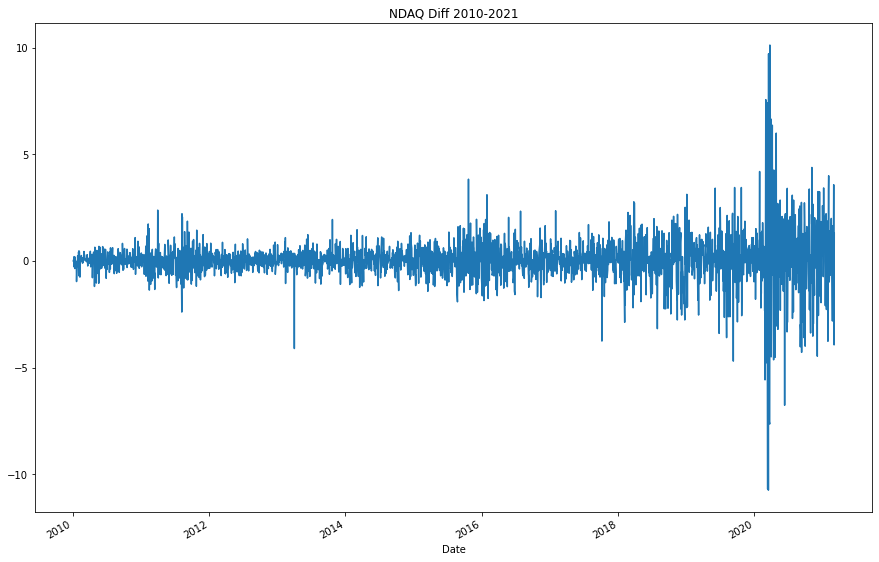

In [12]:
ts_diff.Close.plot(figsize=(15,10), title = "NDAQ Diff 2010-2021")

In [13]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(ts.Close)

(0.40705799542533494, True)

In [21]:
print (test)


NameError: name 'test' is not defined

/Users/oisintong/opt/anaconda3/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


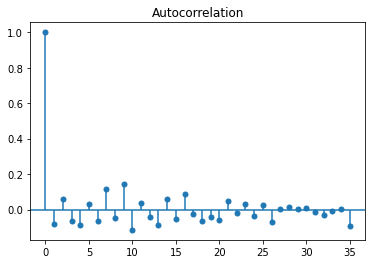

In [32]:
pm.plot_acf(ts_diff.Close)

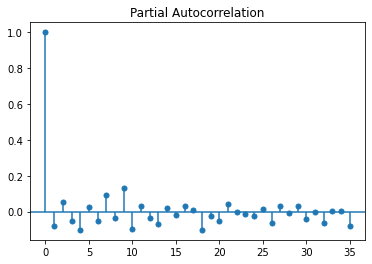

In [31]:
pm.plot_pacf(ts_diff.Close)

In [19]:
stepwise_model_12 = auto_arima(ts.Close, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=6.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=10384.624, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=9556.398, Time=0.44 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.49 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=10377.933, Time=0.14 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=9086.140, Time=1.23 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=15.93 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.60 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=9093.554, Time=1.14 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=9075.987, Time=1.43 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=9535.326, Time=0.64 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=38.07 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=7.54 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=9063.002, Time=1.81 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=95

In [33]:
stepwise_model_7 = auto_arima(ts.Close, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=1.81 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=9939.567, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=9252.379, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=1.12 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=9939.526, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=8964.642, Time=0.47 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=2.54 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=1.12 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=8965.677, Time=0.36 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=8963.331, Time=0.53 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=9253.802, Time=0.40 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=2.95 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=1.59 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=8964.649, Time=0.70 sec
 ARIMA(2,1,1)(2,1,0)[7]             : AIC=8965.197, Time=1.11 s

In [55]:
train = ts.Close.loc['2010-01-01':'2021-02-23']
test7 = ts.Close.loc['2021-02-23': '2021-03-03']
test31 = ts.Close.loc['2021-01-19':'2021-03-03']

In [70]:
stepwise_model.fit(train)
stepwise_model.fit(train)

ARIMA(order=(3, 1, 3), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [56]:
print (test7.size)
print (test31.size)
print (train.size)

7
31
2804


In [69]:
future_forecast_12 = stepwise_model.predict(n_periods=7)
future_forecast = stepwise_model.predict(n_periods=7)

In [60]:
print(future_forecast)

[141.71434718 141.1951918  141.81747555 143.78392932 143.88676714
 144.10393679 144.51034631]


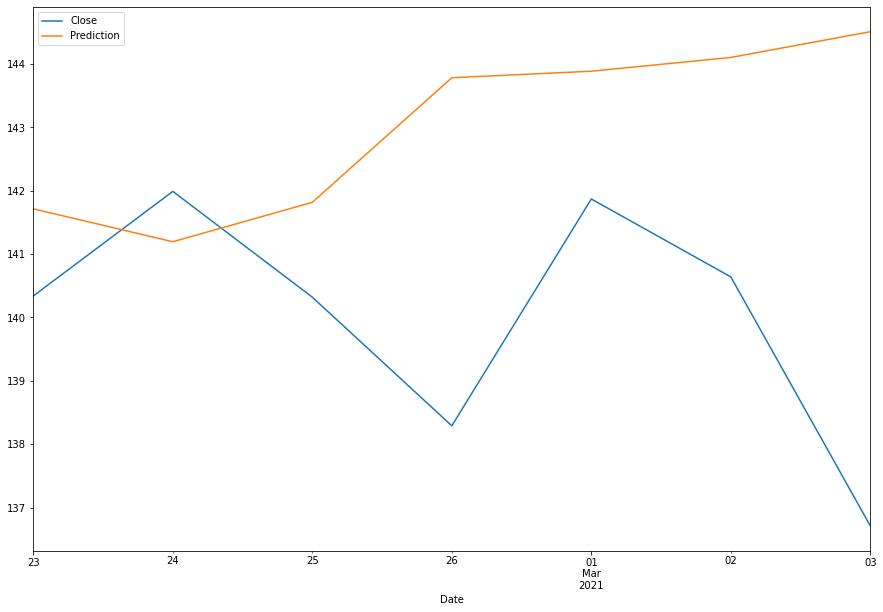

In [77]:
future_forecast = pd.DataFrame(future_forecast,index = test7.index,columns=['Prediction'])

plot7 = pd.concat([test7,future_forecast_7],axis=1).plot(figsize = (15,10))

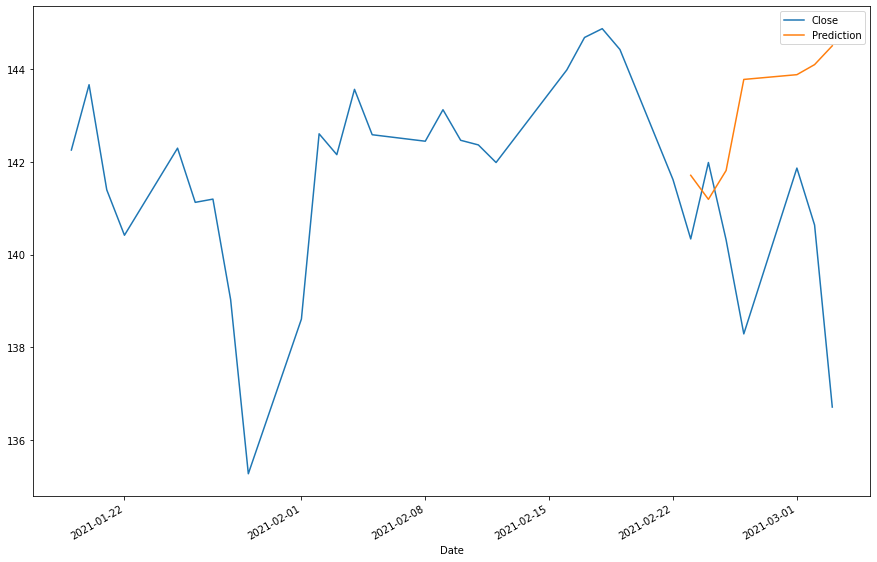

In [75]:
plot7 = pd.concat([test31,future_forecast],axis=1).plot(figsize = (15,10))

<AxesSubplot:xlabel='Date'>

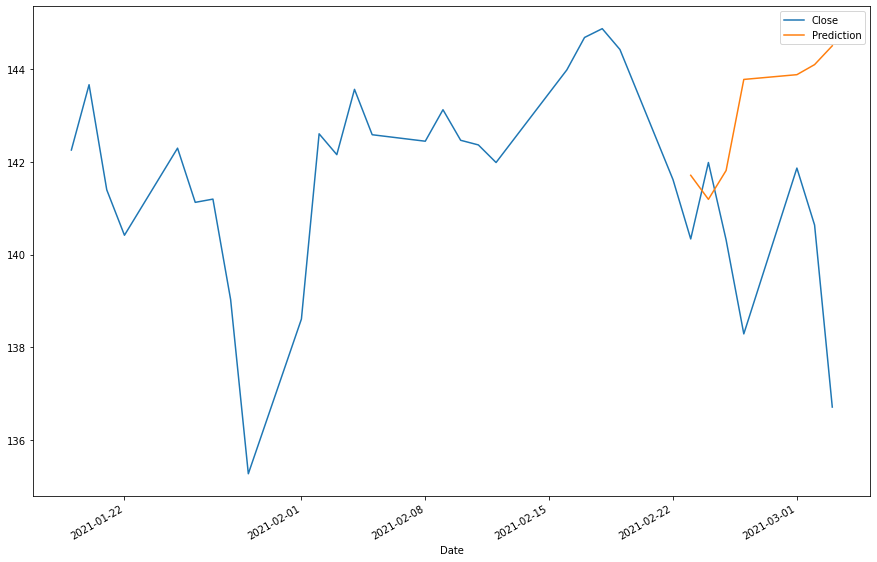

In [78]:
pd.concat([test31,future_forecast],axis=1).plot(figsize = (15,10))